## 1. Introduction to Quantum Computing

### 1.1 Building a Quantum Circuit

In [17]:
from qiskit import QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt

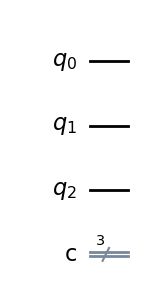

In [18]:
qc = QuantumCircuit(3,3)
qc.draw("mpl")

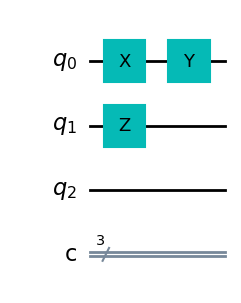

In [3]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.y(0)
qc.z(1)
qc.draw("mpl")

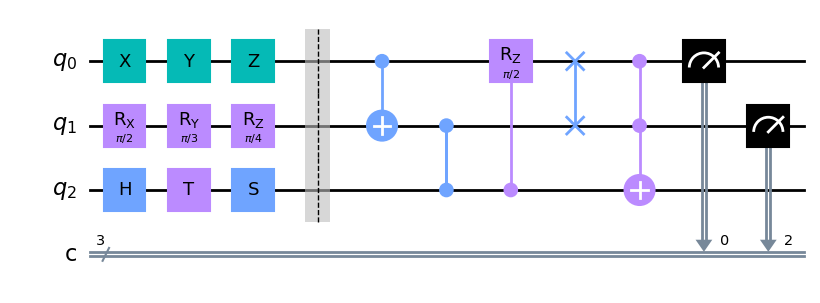

In [4]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.y(0)
qc.z(0)
qc.rx(np.pi/2,1)
qc.ry(np.pi/3,1)
qc.rz(np.pi/4,1)
qc.h(2)
qc.t(2)
qc.s(2)
qc.barrier()
qc.cx(0,1)
qc.cz(1,2)
qc.crz(np.pi/2,2,0)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.measure(0,0)
qc.measure(1,2)
qc.draw("mpl")

### 1.2 Getting the result

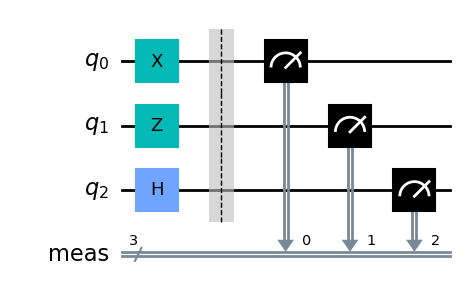

In [5]:
qc1 = QuantumCircuit(3)
qc1.x(0)
qc1.z(1)
qc1.h(2)
qc1.measure_all()
qc1.draw("mpl")

$$\begin{align*}(X \otimes Z \otimes H)\ket{000} &= X\ket{0}\otimes Z\ket{0} \otimes H\ket{0} \\ 
& = \ket{1}\otimes \ket{0}\otimes \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) \\ 
& = \frac{1}{\sqrt{2}}\ket{100}+\frac{1}{\sqrt{2}}\ket{101}
\end{align*}$$

In [6]:
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()

In [7]:
job = backend.run(qc1, shots=1024)

In [8]:
job.result()

Result(backend_name='qasm_simulator', backend_version='0.11.1', qobj_id='8bca06f6-40d4-4c9a-b3c6-799a781ae19d', job_id='ee7a8ed4-524a-4e89-9eb7-bec0335aa39c', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 509, '0x5': 515}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2]], creg_sizes=[['meas', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-88', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=468434092, metadata={'parallel_state_update': 10, 'parallel_shots': 1, 'sample_measure_time': 0.001209625, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': True, 'num_clbits': 3, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.002554

In [9]:
job.result().get_counts()

{'001': 509, '101': 515}

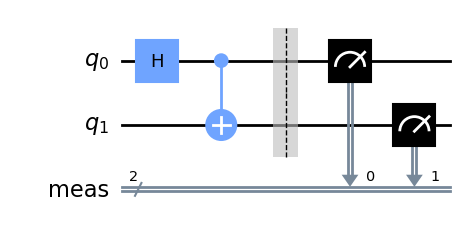

In [10]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)
qc2.measure_all()
qc2.draw("mpl")

$$\begin{align*} 
CX (H \otimes I)\ket{00} &= \frac{1}{\sqrt{2}}CX (\ket{0}+\ket{1})\ket{0} \\
& = \frac{1}{\sqrt{2}} \ket{00}+\frac{1}{\sqrt{2}}\ket{11}

\end{align*}$$

In [11]:
job = backend.run(qc2,shots=1024)
result = job.result().get_counts()

In [12]:
result

{'11': 537, '00': 487}

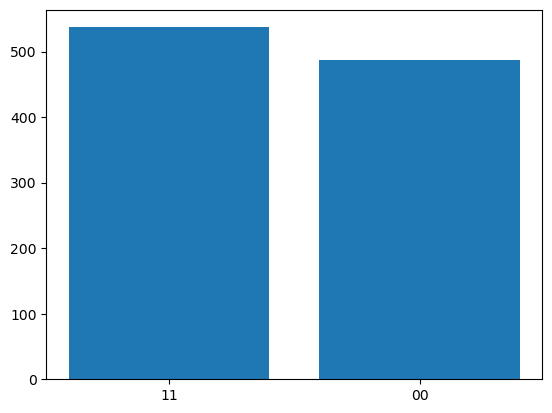

In [13]:
plt.bar(result.keys(),result.values())
plt.show()

### 1.3 Real Device

In [19]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q-kqc', group='internal', project='reservations')

ibmqfactory.load_account:WARNING:2022-12-12 15:30:58,619: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
backend = provider.get_backend("ibmq_kolkata")

In [21]:
job = backend.run(qc2,shots=1024)
job.result().get_counts()

IBMQJobFailureError: "Unable to retrieve result for job 6396caabec40c24496f638b0. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

In [22]:
from qiskit import transpile
qc_compiled = transpile(qc2,backend)

In [26]:
job = backend.run(qc_compiled,shots=4000)
result = job.result().get_counts()

In [27]:
result

{'00': 1995, '01': 50, '10': 54, '11': 1901}

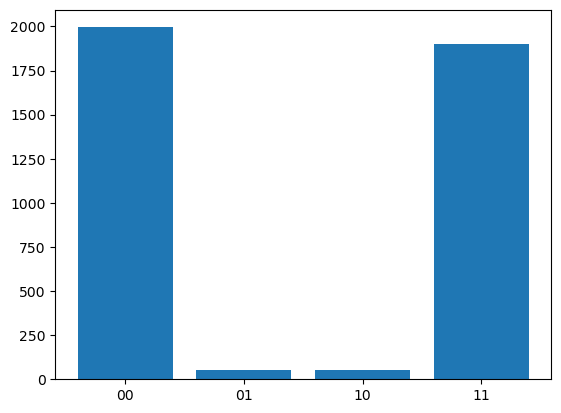

In [28]:
plt.bar(result.keys(),result.values())
plt.show()